In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from scipy.integrate import solve_ivp

from parameters import N, beta, alpha, S0, I0, R0

In [5]:
# Parameters
print(f"N = {N}")
print(f"beta = {beta}")
print(f"alpha = {alpha}")
print(f"S0 = {S0}")
print(f"I0 = {I0}")
print(f"R0 = {R0}")

n_days = 60  # 2 months
noise = 0.01

data_path = Path(".").resolve().parent / "data"

N = 1000
beta = 0.5
alpha = 0.07142857142857142
S0 = 999
I0 = 1
R0 = 0


In [6]:
def generate_data(
    t_array,
    y0,
):

    def func(t, y):
        S, I, R = y
        dS_dt = - beta * S / N * I
        dI_dt = beta * S / N * I - alpha * I
        dR_dt = alpha * I

        return np.array([dS_dt, dI_dt, dR_dt])

    t_span = (t_array[0], t_array[-1])
    sol = solve_ivp(func, t_span, y0, t_eval=t_array)
    return sol.y.T

In [7]:
y0 = [S0, I0, R0]
t_train = np.arange(0, n_days, 1)[:, np.newaxis]
y_train = generate_data(np.ravel(t_train), y0)
y_train += np.random.normal(loc=0, scale=y_train.std(axis=0), size=y_train.shape) * noise
y_train.shape

(60, 3)

/tmp/ipykernel_3762/3466842407.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


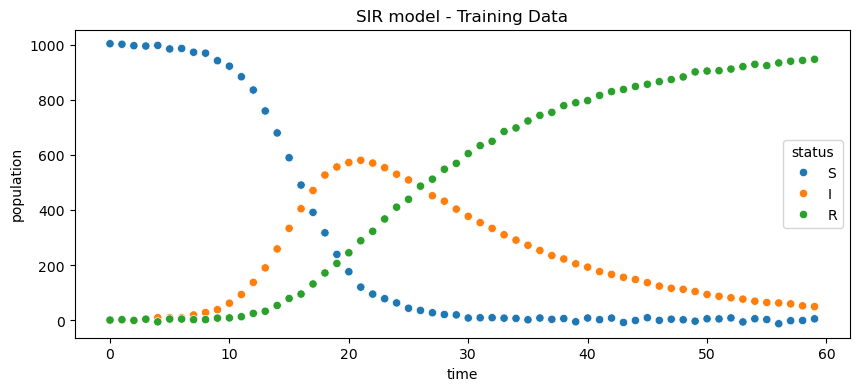

In [11]:
model_name = "SIR"
populations_names = list(model_name)
data_real = (
        pd.DataFrame(y_train, columns=populations_names)
        .assign(time=t_train)
        .melt(id_vars="time", var_name="status", value_name="population")
)

fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(
    data=data_real,
    x="time",
    y="population",
    hue="status",
    legend=True,
    ax=ax
)
ax.set_title(f"{model_name} model - Training Data")
fig.show()

In [9]:
data = pd.DataFrame(np.hstack([t_train, y_train]), columns=list("tSIR"))
data.to_csv(data_path / "sir_noise1.csv", index=False)